# Bits & Bäume Notebook

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import fairtronics_engine as ft

Die Berechnungskette ist 

**Portfolio** F --*(items)*---> **Device** D --*(items)*---> **Part** P --*(gram)*---> **Material** M --*(gram <)*---> **Resource** R --*(gram =)*---> **Country** C

Jeder **Sozialindikator** (aktuell **child labour, forced labour, wage-risk, wage-chance**) weist jedem Land eine Arbeitsrisiko-/-chancewahrscheinlichkeit zu, wobei Arbeitszeit äquivalent zu Gewicht der Ressourcen eines Landes angenommen wird, letztlich also 

**Country** --*(gram >)*--> **Risk/Chance**

Die fünf Stufen von Datenquellen sind:
  * **Originals** = Original-Quellen in allen Formen (nur im Git)
  * **Sources** = Kovertate aus Original-Quellen in Form von CSV-Dateien, aus denen offline die Database generiert wird
  * **Database** = Zusammenhanglose Objekte der Berechnungskette, also F, D, P, C, R und C, zudem die Indikatoren
  * **Inventory** = Bereitstellung eines konkreten Objekts, z.B. eines Device, entstehend aus Teilen einer Database
  * **Assessment** = Sozialbilanz eines solchen konkreten Objekts bzgl. eines Indikators, entstehend aus einem Inventory. 

Originals und Sources sind nicht zugreifbar. Die Database lässt sich zugreifen (**list**, **info**, **search**, **model**)

Inventories und Assessments können angezeigt werden auf folgende Weise:
  1. Zunächst definiert man sich eine Ausschnitt (**view**)
  1. ... den man sich mittels ein paar Operationen noch zurechtbiegt (**sort, threshold, cutoff, cutother, nozeros, group, top, bottom, select, exclude**)
  1. ... bevor man sich ihn anzeigen lässt (**value, table, pie, bar**). 
  1. Zwei (Ausschitte von) Views lassen sich auch vergleichend anzeigen (**percentageof, differenceto, distanceto, multipleof**).

Mit einem  **View** kann man Anfragen an ein Inventory stellen, indem man - stets beginnend mit der Stufe des Objekts selbst - zunächst durch Kleinbuchstaben angibt, wie tief man die Lieferkette betrachtet haben möchte und man darin dann diejenigen Buchstaben groß macht, deren Daten man wissen möchte. Hier ein paar Beispiele, angenommen man hat ein Part als Objekt, z.B. einen Chip:
  * pMr zerlegt den Chip in seine Resourcen, zeigt dann aber nur die Materialien an
  * P zeigt lediglich den Chip an
  * Pm zeigt weiterhin nur den Chip an, aber nach der Materialanalyse
  * pMR zeigt alle Kombinationen von Material und Resource an, die im Chip sind

In [2]:
database = ft.Database("../fairtronics-data/target/full")

Read database ../fairtronics-data/target/full


In [3]:
mnt_reform = ft.Unit(database, ft.DEVICE, "mnt-reform")

In [4]:
mnt_reform.analyse("Dp").view().value_unit()

Value with unit of parts level of device in Device 'MNT Reform 2.0 Laptop':


'1699.7236456903777 items'

In [13]:
mnt_reform.analyse("dP").view().count()

Number of parts in Device 'MNT Reform 2.0 Laptop':


233

In [14]:
mnt_reform.analyse("dP").view().group(by="part manufacturer").count()

Number of parts, grouped by part manufacturer in Device 'MNT Reform 2.0 Laptop':


69

In [15]:
mnt_reform.analyse("dM").view().count()

Number of materials in Device 'MNT Reform 2.0 Laptop':


248

In [16]:
mnt_reform.analyse("dR").view().count()

Number of resources in Device 'MNT Reform 2.0 Laptop':


60

In [17]:
mnt_reform.analyse("dC").view().count()

Number of countries in Device 'MNT Reform 2.0 Laptop':


165

In [5]:
mnt_reform.analyse("M").view_top(5).table()

Materials in Device 'MNT Reform 2.0 Laptop':


In [21]:
mnt_reform.analyse("M").view().select("name", "Gold").table()

Materials where name is gold in Device 'MNT Reform 2.0 Laptop':


In [22]:
mnt_reform.analyse("M[gold]").view().table()

Materials (gold only) in Device 'MNT Reform 2.0 Laptop':


In [23]:
mnt_reform.analyse("R").view_top(5).table()

Resources in Device 'MNT Reform 2.0 Laptop':


In [24]:
mnt_reform.analyse("C").view_top(5).table()

Countries in Device 'MNT Reform 2.0 Laptop':


Indicators level of materials (child labour only) in Device 'MNT Reform 2.0 Laptop':


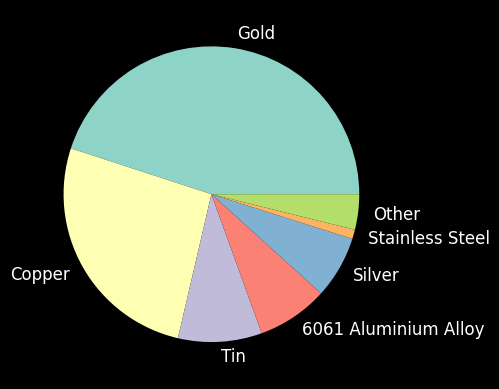

In [25]:
mnt_reform.analyse("Mi[child-labour]").view_top_other(6).pie()
plt.savefig("child_labour_view_M_topother_6_pie.svg")

Indicators level of countries (child labour only) in Device 'MNT Reform 2.0 Laptop':


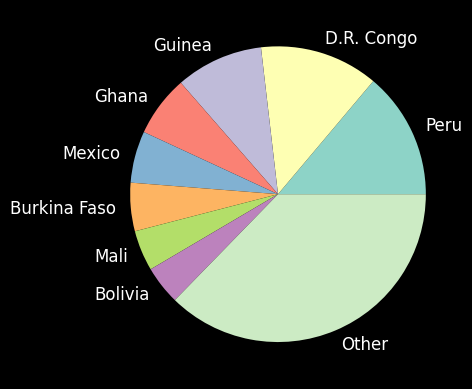

In [27]:
mnt_reform.analyse("Ci[child-labour]").view_top_other(8).pie()
plt.savefig("child_labour_view_C_topother_8_pie.svg")

Top 8 indicators level of parts (child labour only), grouped by part category (aside other) in Device 'MNT Reform 2.0 Laptop':


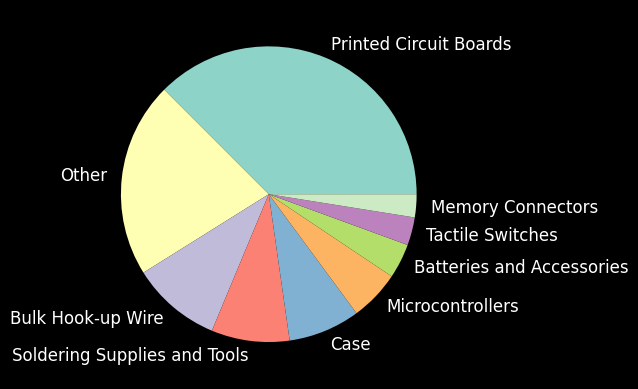

In [30]:
mnt_reform.analyse("Pi[child-labour]").view().group(by="part category").topother(8).pie()

In [38]:
mnt_reform.analyse("Pi[child-labour]").view_top(1).table()

Indicators level of parts (child labour only) in Device 'MNT Reform 2.0 Laptop':


In [42]:
mnt_reform.analyse("PRCi[child-labour]").view_top(1).table()

Indicators level of combinations of parts/resources/countries (child labour only) in Device 'MNT Reform 2.0 Laptop':


Indicators level of materials (forced labour only) in Device 'MNT Reform 2.0 Laptop':


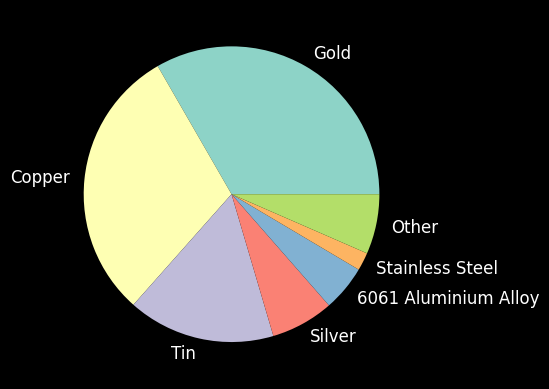

In [43]:
mnt_reform.analyse("Mi[forced-labour]").view_top_other(6).pie()
plt.savefig("forced_labour_view_M_topother_6_pie.svg")

Indicators level of countries (forced labour only) in Device 'MNT Reform 2.0 Laptop':


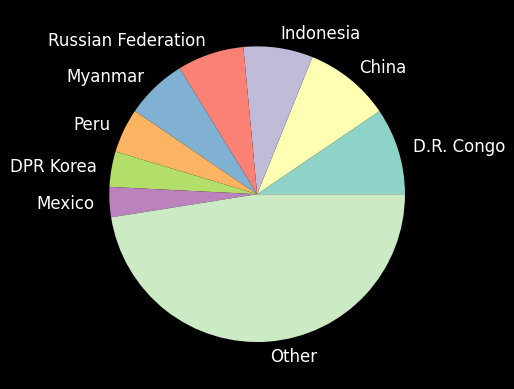

In [44]:
mnt_reform.analyse("Ci[forced-labour]").view_top_other(8).pie()
plt.savefig("forced_labour_view_C_topother_8_pie.svg")

Top 8 indicators level of parts (forced labour only), grouped by part category (aside other) in Device 'MNT Reform 2.0 Laptop':


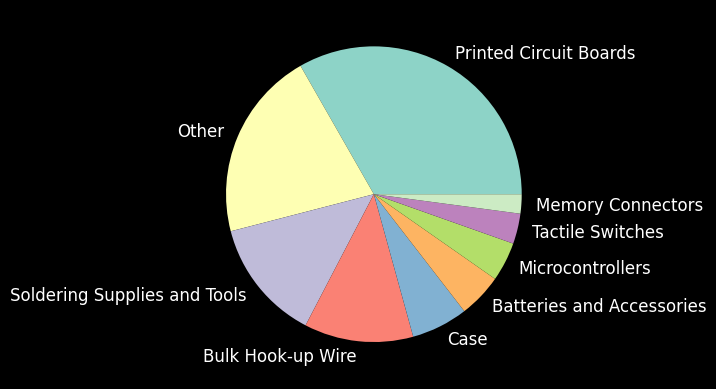

In [45]:
mnt_reform.analyse("Pi[forced-labour]").view().group(by="part category").topother(8).pie()

In [47]:
mnt_reform.analyse("Pi[forced-labour]").view_top(1).table()

Indicators level of parts (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [48]:
mnt_reform.analyse("Mi[forced-labour]").view_top(1).table()

Indicators level of materials (forced labour only) in Device 'MNT Reform 2.0 Laptop':


Indicators level of materials (wage risk only) in Device 'MNT Reform 2.0 Laptop':


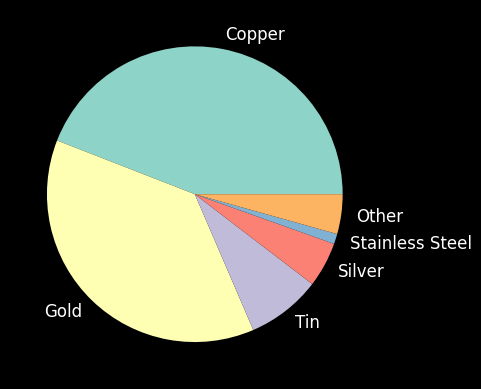

In [49]:
mnt_reform.analyse("Mi[wage-risk]").view_top_other(5).pie()
plt.savefig("wage_risk_view_M_topother_5_pie.svg")

Indicators level of countries (wage risk only) in Device 'MNT Reform 2.0 Laptop':


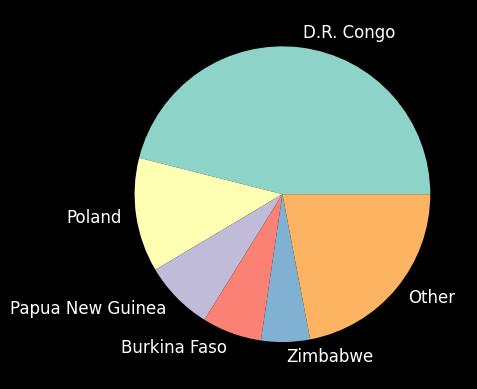

In [50]:
mnt_reform.analyse("Ci[wage-risk]").view_top_other(5).pie()
plt.savefig("wage_risk_view_C_topother_5_pie.svg")

In [51]:
mnt_reform.analyse("Pi[wage-risk]").view().group(by="part category").topother(8).pie()

Top 8 indicators level of parts (wage risk only), grouped by part category (aside other) in Device 'MNT Reform 2.0 Laptop':


In [52]:
mnt_reform.analyse("Pi[wage-risk]").view_top(1).table()

Indicators level of parts (wage risk only) in Device 'MNT Reform 2.0 Laptop':


In [53]:
mnt_reform.analyse("PRCi[wage-risk]").view_top(1).table() 

Indicators level of combinations of parts/resources/countries (wage risk only) in Device 'MNT Reform 2.0 Laptop':


In [57]:
mnt_reform.analyse("R[copper_ground]C[CD]i[wage-risk]").view().percentageof(
    mnt_reform.analyse("R[copper_ground]C[CD]").view()).value_unit()

Value with unit of percentage of “indicators level of combinations of resources/countries (copper ore & congo, democratic republic of the & wage risk only)” within “combinations of resources/countries (copper ore & congo, democratic republic of the only)” in Device 'MNT Reform 2.0 Laptop':


'95.99697 %'

In [68]:
mnt_reform.analyse("Di[human-rights]").view().table()

Indicators level of devices (human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


Top 5 indicators level of parts (human rights (child or forced labour) only), grouped by part manufacturer (aside other) in Device 'MNT Reform 2.0 Laptop':


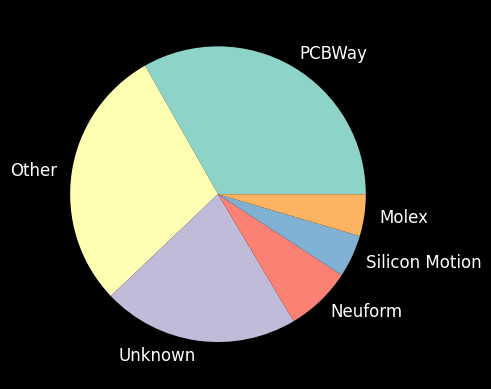

In [63]:
mnt_reform.analyse("Pi[human-rights]").view().group(by="part manufacturer").topother(5).pie()
plt.savefig("risk_view_P_groupby_manufacturer_topother_5_pie.svg")

In [69]:
mnt_reform.analyse("PRCi[human-rights]").view_top_other(5).table(columns=[ft.SHARE,ft.AMOUNT,ft.UNIT,'part manufacturer','part short name','resource short name','location short name'])

Indicators level of combinations of parts/resources/countries (human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


In [84]:
lfp = ft.Unit(database, ft.PART, "jgne-JGCFR18650")
nmc111 = ft.Unit(database, ft.PART, "jgne-JGCNR18650-nmc111")
nmc811 = ft.Unit(database, ft.PART, "jgne-JGCNR18650-nmc811")

In [71]:
lfp.analyse("Pr").view().value_unit()

Value with unit of resources level of parts in Part '18650 - 1800mAh 3.2V - 5.4A Battery Cell LiFePO4':


'802.4817 g'

In [73]:
lfp.analyse("R").view().table()

Resources in Part '18650 - 1800mAh 3.2V - 5.4A Battery Cell LiFePO4':


In [85]:
nmc111.analyse("Pr").view().value_unit()

Value with unit of resources level of parts in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell NMC 111':


'8476.388 g'

In [78]:
nmc111.analyse("R").view().table()

Resources in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell MNC 111':


In [79]:
nmc811.analyse("Pr").view().value_unit()

Value with unit of resources level of parts in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell MNC 811':


'4189.1846 g'

In [97]:
lfp_hr = lfp.analyse("Pi[human-rights]").view()
lfp_hr.value_unit()

Value with unit of indicators level of parts (human rights (child or forced labour) only) in Part '18650 - 1800mAh 3.2V - 5.4A Battery Cell LiFePO4':


'9.727163 g'

In [98]:
nmc111_hr = nmc111.analyse("Pi[human-rights]").view()
nmc111_hr.value_unit()

Value with unit of indicators level of parts (human rights (child or forced labour) only) in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell NMC 111':


'589.47327 g'

In [99]:
nmc811_hr = nmc811.analyse("Pi[human-rights]").view()
nmc811_hr.value_unit()

Value with unit of indicators level of parts (human rights (child or forced labour) only) in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell NMC 811':


'193.8641 g'

Part '18650 - 1800mah 3.2v - 5.4a battery cell lifepo4', part '18650 - 2200mah 3.6v - 2.2a battery cell nmc 111' and part '18650 - 2200mah 3.6v - 2.2a battery cell nmc 811' in comparison:


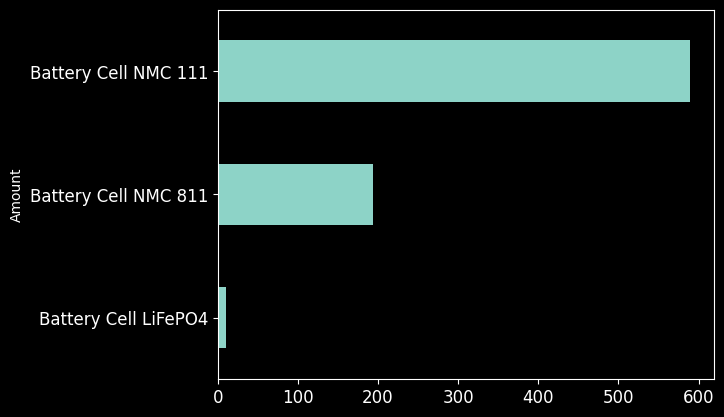

In [100]:
ft.Comparison([lfp_hr,nmc111_hr,nmc811_hr]).bar()
plt.savefig("comp_harm_view_P_lfp_nmc111_nmc811_barh.svg")

In [101]:
mnt_reform.analyse("Pi[human-rights]").view().group(by="part category").topother(8).pie()
plt.savefig("risk_view_P_groupby_category_topother_8_pie.svg")

Top 8 indicators level of parts (human rights (child or forced labour) only), grouped by part category (aside other) in Device 'MNT Reform 2.0 Laptop':


Top 4 indicators level of resources (peru & human rights (child or forced labour) only) (aside other) in Device 'MNT Reform 2.0 Laptop':


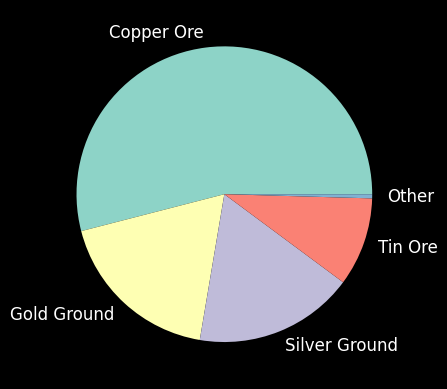

In [102]:
mnt_reform.analyse("Rc[PE]i[human-rights]").view().topother(4).pie()
plt.savefig("risk_view_RC_topother_8_pie.svg")

In [107]:
mnt_reform.analyse("Ri[human-rights]").view_top(8).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.NAME])

Indicators level of resources (human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


In [105]:
mnt_reform.analyse("Dr[natural_gas.*|oil_crude.*]i[human-rights]").view().percentageof(mnt_reform.analyse("Di[human-rights]").view()).value_unit()

Value with unit of percentage of “indicators level of devices (natural gas,crude oil & human rights (child or forced labour) only)” within “indicators level of devices (human rights (child or forced labour) only)” in Device 'MNT Reform 2.0 Laptop':


'0.6692055 %'

In [110]:
mnt_reform.analyse("MR[natural_gas.*|oil_crude.*]i[human-rights]").view_top(10).table()

Indicators level of combinations of materials/resources (natural gas,crude oil & human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


Top 10 percentage of “countries level of resources (russian federation only)” within “countries level of resources” in Device 'MNT Reform 2.0 Laptop':


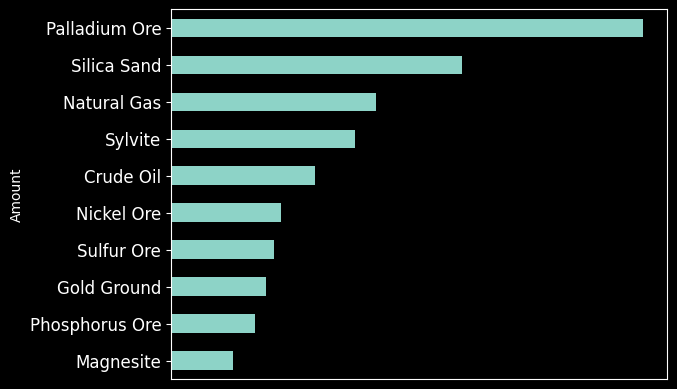

In [111]:
mnt_reform.analyse("Rc[RU]").view().percentageof(mnt_reform.analyse("Rc").view()).top(10).bar(xticks=[])

In [116]:
mnt_reform.analyse("R[tantalum_ground]").view().value()

Value of resources (tantalum ore only) in Device 'MNT Reform 2.0 Laptop':


0.0

In [117]:
trackball = ft.Unit(database, ft.DEVICE, "mnt-MREFATBC20R01|mnt-MREFATBS20R01")

In [118]:
trackpad = ft.Unit(database, ft.DEVICE, "mnt-MREFATPC20R01")

In [121]:
trackball.analyse("Di[human-rights]").view().sum()

Sum of amount of indicators level of devices (human rights (child or forced labour) only) in Devices 'Trackball Sensor PCB Assembly','Trackball Controller PCB Assembly':


74.56612

In [122]:
trackpad.analyse("Di[human-rights]").view().value()

Value of indicators level of devices (human rights (child or forced labour) only) in Device 'Touchpad Sensor and Controller PCB Assembly':


20.75221

In [127]:
mnt_reform_df_view = mnt_reform.analyse("PmR[gold_ground|tin_ground|tantalum_ground|tungsten_ground]C[congo-dr|rwanda|uganda|burundi]").view()
mnt_reform_df_view.top(10).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.NAME,"part manufacturer","part category"])

Top 10 combinations of parts/resources/countries (8 of them only) in Device 'MNT Reform 2.0 Laptop':


In [132]:
nagerit_mouse = ft.Unit(database, ft.DEVICE, "nager-it_mouse")
nagerit_mouse.analyse("Dr").view().value_unit()

Value with unit of resources level of devices in Device 'Nager-IT computer mouse':


'4349.4883 g'

In [128]:
child_labour_nagerit_mouse = nagerit_mouse.analyse("Dci[child-labour]")
child_labour_nagerit_mouse.view().percentageof(nagerit_mouse.analyse("Dc").view()).value()

Value of percentage of “indicators level of devices (child labour only)” within “countries level of devices” in Device 'Nager-IT computer mouse':


1.6960751

In [ ]:
nagerit_mouse = ft.Unit(database, ft.DEVICE, "nager-it_mouse")
child_labour_nagerit_mouse = nagerit_mouse.analyse("Dci[child-labour]")
child_labour_nagerit_mouse.view().percentageof(nagerit_mouse.analyse("Dc").view()).value()

In [137]:
nagerit_mouse.analyse("dI[usage=straight]").view().table(columns=[ft.AMOUNT,ft.UNIT,ft.NAME])

Indicators (12 of them only) in Device 'Nager-IT computer mouse':


Indicators level of devices (human rights (child or forced labour) only) in Portfolio 'All main devices in Fairtronics':


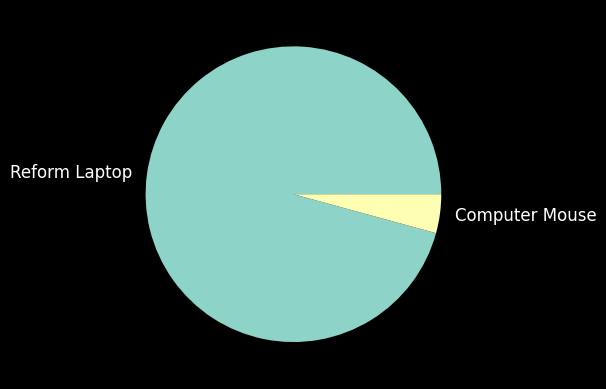

In [138]:
ft.Unit(database, ft.PORTFOLIO, "comparison").analyse("Di[human-rights]").view().pie()